In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import matplotlib.patheffects as path_effects
import matplotlib.ticker as mticker

In [12]:
# Load the CSV into a DataFrame
file_path = "/home/betty/Desktop/Becode_training_path/Projects/Data_analysis/csv-data/cleaned_dataset_analysis (1).csv" 
df = pd.read_csv(file_path)

Use the IQR to identify outliers as points lying beyond 1.5×IQR

In [13]:
# Disable scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
print(df["Price"].describe()) # Description of the dataframe

count      10701.00
mean      747139.59
std       849209.35
min        27500.00
25%       279000.00
50%       525000.00
75%       850000.00
max     10500000.00
Name: Price, dtype: float64


In [14]:
#Calculate quartiles and IQR
Q1 = df['Price'].quantile(0.25)  # (25%)
Q3 = df['Price'].quantile(0.75)  # (75%)
IQR = Q3 - Q1  

# Calculate limits for outliers
limit_inferior = Q1 - 1.5 * IQR
limit_superior = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < limit_inferior) | (df['Price'] > limit_superior)]
print(f"Limit inferior: {limit_inferior}")
print(f"Limit superior: {limit_superior}")
print("\nOutliers:")
print(len(outliers))
print(outliers)


Limit inferior: -577500.0
Limit superior: 1706500.0

Outliers:
819
                  Locality                                           Zip Code  \
4                Kalmthout  0        9000\n1        1180\n2        1040\n3...   
11                   Uccle  0        9000\n1        1180\n2        1040\n3...   
12               Bruxelles  0        9000\n1        1180\n2        1040\n3...   
20           Sint-idesbald  0        9000\n1        1180\n2        1040\n3...   
24                   Uccle  0        9000\n1        1180\n2        1040\n3...   
...                    ...                                                ...   
10667              Belsele  0        9000\n1        1180\n2        1040\n3...   
10686              Ixelles  0        9000\n1        1180\n2        1040\n3...   
10688                Lasne  0        9000\n1        1180\n2        1040\n3...   
10693  Woluwe-saint-pierre  0        9000\n1        1180\n2        1040\n3...   
10694             Sprimont  0        9000\

In [15]:
# Expanding the interquartile range
Q1 = df['Price'].quantile(0.10)  #  (10%)
Q3 = df['Price'].quantile(0.90)  #  (90%)
IQR = Q3 - Q1 

# Calculate limits for outliers
limit_inferior = Q1 - 1.5 * IQR
limit_superior = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < limit_inferior) | (df['Price'] > limit_superior)]
print(f"Limit inferior: {limit_inferior}")
print(f"Limit superior: {limit_superior}")
print("\nOutliers:")
print(len(outliers))
print(outliers)



Limit inferior: -1745000.0
Limit superior: 3439000.0

Outliers:
236
                  Locality                                           Zip Code  \
4                Kalmthout  0        9000\n1        1180\n2        1040\n3...   
12               Bruxelles  0        9000\n1        1180\n2        1040\n3...   
38            Knokke-heist  0        9000\n1        1180\n2        1040\n3...   
45            Knokke-heist  0        9000\n1        1180\n2        1040\n3...   
49      Sint-martens-latem  0        9000\n1        1180\n2        1040\n3...   
...                    ...                                                ...   
10002            Bruxelles  0        9000\n1        1180\n2        1040\n3...   
10288         Knokke-zoute  0        9000\n1        1180\n2        1040\n3...   
10464  Knokke-heist-knokke  0        9000\n1        1180\n2        1040\n3...   
10612                 Lier  0        9000\n1        1180\n2        1040\n3...   
10694             Sprimont  0        9000

In [16]:
# Describing the outliers subset
print(outliers['Price'].describe())


count        236.00
mean     4942575.42
std      1379161.44
min      3475000.00
25%      3950000.00
50%      4500000.00
75%      5695000.00
max     10500000.00
Name: Price, dtype: float64


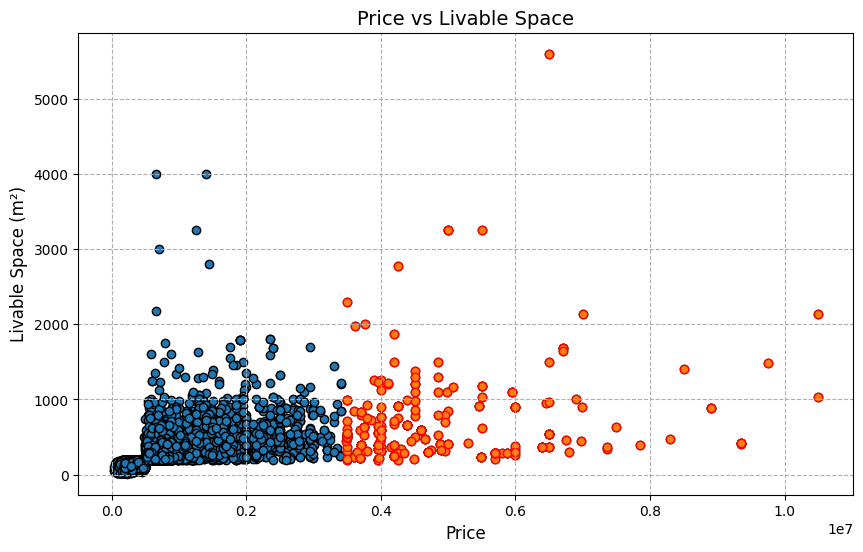

In [17]:
# Plotting outliers (orange dots)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Livable Space (m2)'], edgecolor='k')
plt.scatter(outliers['Price'], outliers['Livable Space (m2)'], edgecolor='r')

plt.title('Price vs Livable Space', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Livable Space (m²)', fontsize=12)
plt.grid(True, linestyle='--')
plt.show()

In [18]:
# Group by 'Subtype of Property' and calculate averages and counts
grouped = df.groupby('Subtype of Property').agg(
    avg_price=('Price', 'mean'),  # Calculate the average price
    avg_space=('Livable Space (m2)', 'mean'),  # Calculate the average livable space
    count=('Price', 'size')  # Count the number of elements
).reset_index()

# Calculate the ratio of Price / Livable Space
grouped['price_per_m2'] = grouped['avg_price'] / grouped['avg_space']

# Sort by price_per_m2 in descending order (from highest to lowest)
grouped_sorted = grouped.sort_values(by='price_per_m2', ascending=False)

# View the results
print(grouped_sorted)


     Subtype of Property  avg_price  avg_space  count  price_per_m2
12                   kot  265033.33      51.28     18       5168.58
18             penthouse 1034645.94     207.22    167       4992.95
9            flat-studio  187147.15      38.59    123       4850.21
6                 duplex  691759.22     158.49    178       4364.57
10          ground-floor  444817.29     119.99    150       3707.02
22                 villa 1373656.34     373.69   1371       3675.93
14           manor-house 1386136.36     377.59     22       3671.00
19          service-flat  250933.33      69.47     30       3612.28
0              apartment  412794.64     114.40   2562       3608.50
13                  loft  914557.82     268.78     49       3402.68
21               triplex  602378.85     178.85     26       3368.14
7   exceptional-property 1472484.30     526.28    363       2797.93
15               mansion 1261558.17     467.86    223       2696.44
11                 house  645186.09     241.73  

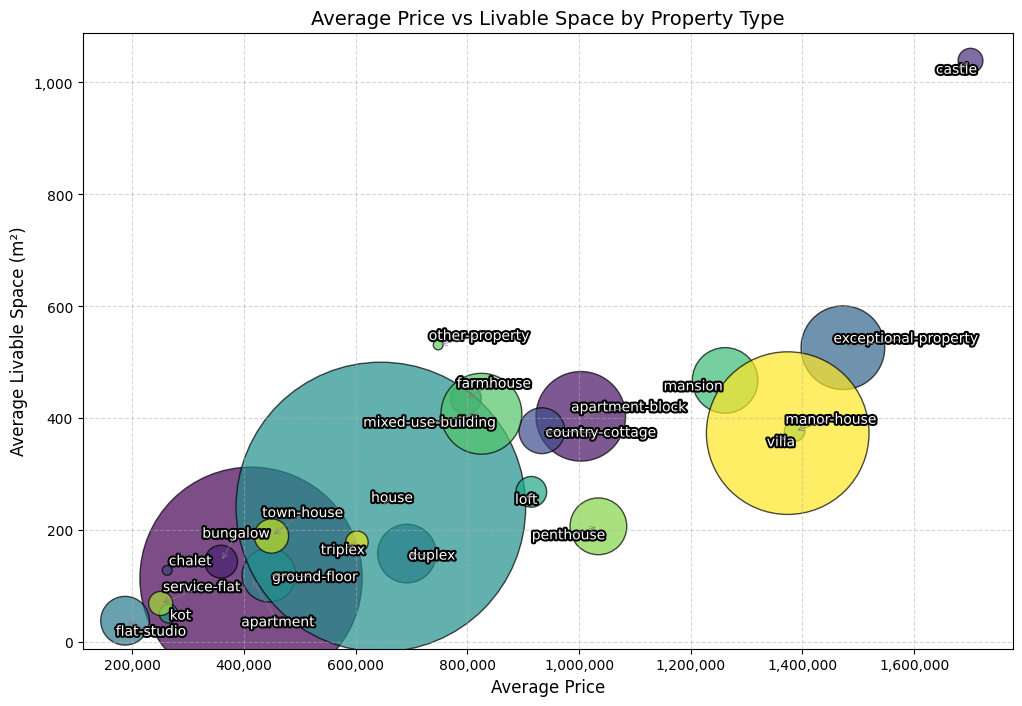

In [19]:
plt.figure(figsize=(12, 8))

# Scatter plot where the size (s) is proportional to the count
plt.scatter(
    grouped['avg_price'], 
    grouped['avg_space'], 
    s=grouped['count'] * 10,  # Scale the size (adjustable)
    alpha=0.7, 
    edgecolor='k', 
    c=range(len(grouped)), cmap='viridis'  # Color by category
)

# Create a list of text elements to adjust
texts = []
for i, row in grouped.iterrows():
    txt = plt.text(
        row['avg_price'], 
        row['avg_space'], 
        row['Subtype of Property'], 
        fontsize=10,
        color='w',  # Text color
        ha='center', 
        va='center'
    )
    # Add effects to the text
    txt.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='black'),  # Black outline
        path_effects.Normal()  # Normal text on top
    ])
    texts.append(txt)  # Add the text to the list

# Adjust the label positions to avoid overlaps
adjust_text(
    texts, 
    arrowprops=dict(arrowstyle="->", color='gray', lw=0.5),  # Optional: arrows for moved labels
    only_move={'points': 'y', 'text': 'y'},  # Move labels vertically only (adjustable)
    force_text=1.2,  # Extra force to avoid overlaps
    force_points=0.8  # Separation force between points
)

# Configure axes without scientific notation
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Format with commas and no decimals
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))

# Configure the plot
plt.title('Average Price vs Livable Space by Property Type', fontsize=14)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Average Livable Space (m²)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Conclusions:

### Conclusions over the output and plot

1. Price Variation by Property Type:
 - Luxury Properties: There are significant differences in the average prices across different property types. For instance, exceptional properties have the highest average price of 1,470,683.66, followed by manors, villas, and penthouses. These types typically have more expansive properties and luxury amenities, reflected in the high average prices.
 - Affordable Properties: On the lower end, property types like chalet (average price: 262,600.00) and bungalow (average price: 359,107.14) are more affordable.

2. Property Size and Price Relationship:
- The larger properties tend to have higher average prices. For example, villas have the largest average space (372.75 m²) and are among the most expensive properties. Similarly, manor-houses and exceptional properties are also large in size (average space around 377 m² and 526 m², respectively).
- Smaller properties like kot (51.28 m²), flat-studio (38.45 m²), and chalet (128.60 m²) are priced lower, but they still show substantial variation in price.

3. Price per Square Meter (Price/m²):
- The price per square meter varies greatly across property types. The highest price per square meter is seen in kots (5,168.58 €/m²) and penthouses (4,992.95 €/m²). These properties likely represent small, but highly sought-after or luxurious properties.
- On the other hand, properties like town-houses (2,366.14 €/m²) and farms (1,818.26 €/m²) have much lower price-per-square-meter values, reflecting either their lower overall prices or their larger size compared to the expensive properties.

4. Outliers and High-Value Properties:
- The outlier subset describes a distinct group of high-value properties. These properties have an average price of 4,953,367.10 with a standard deviation of 1,391,010.76, indicating significant variation.
- The minimum price for outliers is 3,475,000.00, and the maximum is 10,500,000.00, indicating that these high-value properties can be extremely expensive and rare, possibly representing luxury estates or commercial properties.
- The 25th percentile (3950000.00) and the 75th percentile (5,695,000.00) suggest that the bulk of these outliers are priced between 3.9 million and 5.7 million.

### General conclusion: What to do with outliers?

_Impact of Outliers on Price Prediction:_
Outliers are crucial for price prediction and since the goal is to predict property prices, the outliers in the dataset likely represent rare but high-value properties. These outliers are valid data points that can significantly impact the prediction of expensive properties (e.g., mansions, castles, exceptional properties). **Dropping** these outliers could result in a model that fails to capture the full range of possible property prices, especially at the high-end of the real estate market.

_Influence on Model Performance:_
Linear models (e.g., Linear Regression) tend to be sensitive to outliers, as they can distort the regression line. However, in the case of property prices, it is important to account for extreme high-value properties to ensure accurate predictions.
Tree-based models (e.g., Decision Trees, Random Forests, Gradient Boosting) are generally less sensitive to outliers and can handle extreme values more effectively without being overly influenced by them.